In [15]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import requests
import torch
from datasets import load_dataset


In [16]:
# Load the trained model and feature extractor
model_path = 'Andrew-Finch/vit-base-beans'
num_labels = 3  # Replace with the actual number of labels in your dataset

id2label = {0: 'angular_leaf_spot', 1: 'bean_rust', 2: 'healthy'}  # Replace with your actual id2label mapping
label2id = {'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}   # Replace with your actual label2id mappin

model = ViTForImageClassification.from_pretrained(
    model_path,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

feature_extractor = ViTFeatureExtractor.from_pretrained(model_path)


preprocessor_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

/Users/andrewfinch/Projects/LithoVIT_Training/.venv/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [17]:

ds = load_dataset('beans')


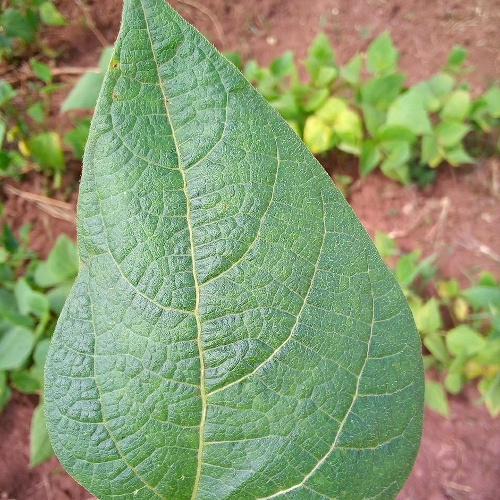

In [21]:
# Load and preprocess the image
# image_url = ds['test']['image_file_path'][0]  # Replace with your image URL or path
# response = requests.get(image_url)
img = ds['test']['image'][100]
img

In [23]:

# Preprocess the image according to the feature extractor
inputs = feature_extractor(images=img, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

print(f'Predicted class: {predicted_class_label}')

Predicted class: healthy
